# Prob 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
x = []
t = []
DataSet = pd.read_csv('./dataset/gp_t.csv',header=None,low_memory=False)
DataSet1 = pd.read_csv('./dataset/gp_x.csv',header=None,low_memory=False)
for i in range(0,100):
    x.append(DataSet1[0][i])
x = np.array(x)
for i in range(0,100):
    t.append(DataSet[0][i])
t = np.array(t)

In [3]:
N = 100
N_train = 50
N_test = 50
beta_inv = 1

train_t,train_x = np.zeros([N_train,1]),np.zeros([N_train,1])
test_t,test_x= np.zeros([N_test,1]),np.zeros([N_train,1])

train_t = t[0:N_train]
train_x = x[0:N_train]
test_t = t[N_test:N]
test_x = x[N_test:N]

theta = [[0, 0, 0, 1],[1, 16, 0, 0],[1, 16, 0, 4],[1, 64, 32, 0]]

In [4]:
def KN(theta_list, xn, xm):    
    return theta_list[0] * (math.exp((-theta_list[1] / 2 * ((xn - xm) ** 2)))) + theta_list[2] + theta_list[3] * xn * xm

In [5]:
def gaussian(theta_list, xn, cov_inv):
    k = np.zeros(N_train)
    for i in range(N_train):
        k[i] = KN(theta_list, xn, train_x[i])
        
    mean = np.dot(k, np.dot(cov_inv, train_t.reshape(N_train, 1)) )
    var = KN(theta_list, xn, xn) + beta_inv - np.dot(k, np.dot(cov_inv, k.reshape(N_train, 1))) 

    
    return mean, var

In [6]:
def train_theta(theta,t):
    x = np.arange(0, 1.001, 0.001)
    y = np.empty(0)
    std = np.empty(0)
    cov = np.zeros([N_train, N_train])   
    for i in range(N_train):
        for j in range(N_train):
            cov[i][j] = KN(t, train_x[i], train_x[j])
            if (i == j):
                cov[i][j] += beta_inv
    
    cov_inv = np.linalg.inv(cov)
    
    for xn in x:
        mean, var = gaussian(t, xn, cov_inv)
        std = np.append(std, math.sqrt(var))
        y = np.append(y, mean)
        
        
    plt.plot(x, y, color = 'red')    
    plt.fill_between(x, y - std, y + std, color = 'pink')
    plt.scatter(train_x, train_t, color = 'blue', marker = '.')
    plt.title("theta = {}".format(t))
    plt.show()
    rms_err = 0

    for i in range(N_train):
        mean, var = gaussian(t, train_x[i], cov_inv)
        rms_err += (mean - train_t[i]) ** 2
        
    rms_err = math.sqrt(rms_err/N_train)
    print ('Train data Error : {}'.format(rms_err))
    rms_err = 0
    
    
    for i in range(100-N_train):
        mean, var = gaussian(t, test_x[i], cov_inv)
        rms_err += (mean - test_t[i]) ** 2
    rms_err = math.sqrt(rms_err/N_train)
    print ('Test data Error  : {}'.format(rms_err)) 
    
    print('Blue: Original dataset , Red: mean')

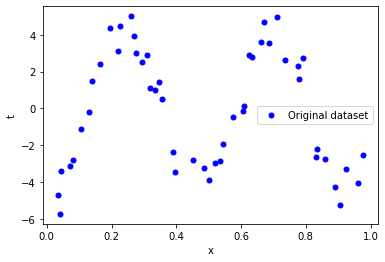

In [7]:
plt.plot(train_x[0:N_train], train_t[0:N_train], 'bo', label = 'Original dataset',markersize=5)

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('t')
#plt.title(r'$\theta$ = (1,16,0,0).')
plt.show() 

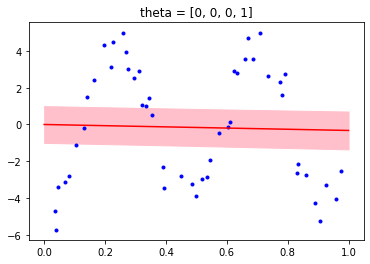

Train data Error : 3.1292014298222433
Test data Error  : 3.3443986601861146
Blue: Original dataset , Red: mean


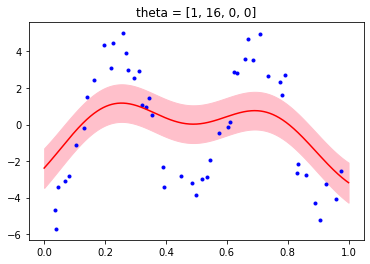

Train data Error : 2.4239279278312194
Test data Error  : 2.6680517502524466
Blue: Original dataset , Red: mean


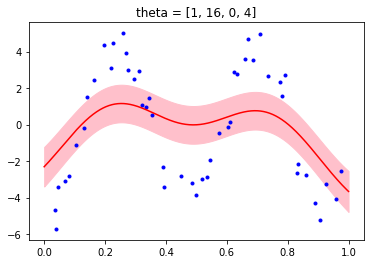

Train data Error : 2.4105764871252062
Test data Error  : 2.6569980001669165
Blue: Original dataset , Red: mean


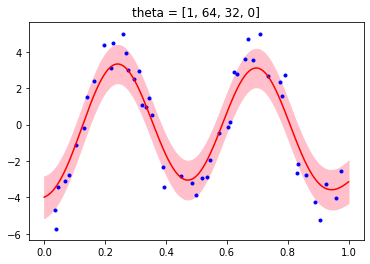

Train data Error : 1.0428861621832175
Test data Error  : 1.1627590936118612
Blue: Original dataset , Red: mean


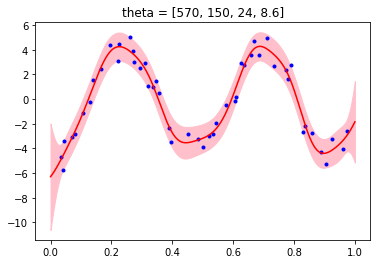

Train data Error : 0.6582610230813177
Test data Error  : 1.124881177568828
Blue: Original dataset , Red: mean


In [8]:
for t in theta:
    train_theta(theta,t)
    
    
t1 = [[570,150,24,8.6]]


for t in t1:
    train_theta(theta = t1 ,t = t)

# Prob 2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
import pandas as pd
from sklearn import svm
from collections import Counter

In [10]:
x = []
with open('./dataset/x_train.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
# 以迴圈輸出每一列
    for row in rows:
        tmp = []
        for r in row:
            tmp.append(float(r)/255)
        x.append(tmp)
#print((x[0]))
x = np.mat(x)

In [11]:
t = []
with open('./dataset/t_train.csv', newline='') as csvfile:
    rows = csv.reader(csvfile)
# 以迴圈輸出每一列
    for row in rows:
        #print(row)
        for r in row:
            #print(r)
            t.append(int(r))
#print((x[0]))
t = np.array(t)
#print(t)

In [12]:
clf = svm.SVC(kernel = 'linear')

In [13]:
def pca(dataMat, topNfeat=4096):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals, eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[: -(topNfeat+1): -1]
    redEigVects = eigVects[:, eigValInd]
    lowDDataMat = meanRemoved * redEigVects
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [14]:
a, b = pca(x,2)
a = list(a)
a = np.array(a)
x_pca = []
for i in a:
    for j in i:
        tmp = []
        tmp.append(float(j[0]))
        tmp.append(float(j[1]))
        x_pca.append(tmp)
#print((x_pca[0]))

/Users/weichilee/opt/anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
/Users/weichilee/opt/anaconda3/envs/sklearn-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [15]:
class_1_index = []
class_2_index = []
filter_x01 = []
filter_t01 = []
filter_x02 = []
filter_t02 = []
filter_x12 = []
filter_t12 = []
def binrary_filter(class_1,class_2):
    class_1_index.clear()
    class_2_index.clear()

    for i in range(0,len(t)):
        if t[i] == class_1:
            class_1_index.append(i)
        elif t[i] == class_2:
            class_2_index.append(i)
            
    if class_1 == 0 and class_2 == 1:
        for j in class_1_index:
            filter_x01.append(x_pca[j])
        for j in class_2_index:
            filter_x01.append(x_pca[j])
        for j in range(0,len(class_1_index)):
            filter_t01.append(1)
        for j in range(0,len(class_2_index)):
            filter_t01.append(-1)
    elif class_1 == 0 and class_2 == 2:
        for j in class_1_index:
            filter_x02.append(x_pca[j])
        for j in class_2_index:
            filter_x02.append(x_pca[j])
        for j in range(0,len(class_1_index)):
            filter_t02.append(1)
        for j in range(0,len(class_2_index)):
            filter_t02.append(-1)
    elif class_1 == 1 and class_2 == 2:
        for j in class_1_index:
            filter_x12.append(x_pca[j])
        for j in class_2_index:
            filter_x12.append(x_pca[j])
        for j in range(0,len(class_1_index)):
            filter_t12.append(1)
        for j in range(0,len(class_2_index)):
            filter_t12.append(-1)

In [16]:
def svm_get_weight(class_1,class_2):
    if class_1 == 0 and class_2 == 1: 
        clf.fit(filter_x01,filter_t01) 
        v = clf.support_vectors_
        a = clf.dual_coef_
        w = np.dot(a,v)
        b = clf.intercept_
    elif class_1 == 0 and class_2 == 2: 
        clf.fit(filter_x02,filter_t02) 
        v = clf.support_vectors_
        a = clf.dual_coef_
        w = np.dot(a,v)
        b = clf.intercept_
    elif class_1 == 1 and class_2 == 2: 
        clf.fit(filter_x12,filter_t12) 
        v = clf.support_vectors_
        a = clf.dual_coef_
        w = np.dot(a,v)
        b = clf.intercept_

    return  [ w , b , v]
    

In [17]:
#Get range of x_pca
xpca_min1,xpca_min2 = np.amin(x_pca,axis = 0)
xpca_max1,xpca_max2 = np.amax(x_pca,axis = 0)
x_range1 = np.arange(xpca_min1,xpca_max1,0.02)
x_range2 = np.arange(xpca_min2,xpca_max2,0.02)
x_range1 = np.reshape(x_range1,(1,len(x_range1)))
x_range2 = np.reshape(x_range2,(len(x_range2),1))

In [18]:
#class 0 vs class 1
binrary_filter(0,1)
#w01 , b01 , v01 = [ svm_get_weight(0,1) ]
#print(svm_get_weight(0,1))
w01 = svm_get_weight(0,1)[0]
b01 = svm_get_weight(0,1)[1]
v_01 = svm_get_weight(0,1)[2]
#print(len(filter_x01),len(b01))
#y01 = np.dot(w01,filter_x01)+b01


#class0 vs class2
binrary_filter(0,2)
#svm_get_weight(0,2)
w02 = svm_get_weight(0,2)[0]
b02 = svm_get_weight(0,2)[1]
v_02 = svm_get_weight(0,2)[2]


#class 1 vs class2
binrary_filter(1,2)
#svm_get_weight(1,2)
w12 = svm_get_weight(1,2)[0]
b12 = svm_get_weight(1,2)[1]
v_12 = svm_get_weight(1,2)[2]

sv = []
for i in w01:
    w_01 = i
for i in b01:
    b_01 = i

for i in w02:
    w_02 = i
for i in b01:
    b_02 = i
    
for i in w12:
    w_12 = i
for i in b12:
    b_12 = i
for i in v_01:
    sv.append(i)
for i in v_02:
    sv.append(i)
for i in v_12:
    sv.append(i)
#print(len(sv))

In [19]:
y_01 = np.dot(w_01[0],x_range1)+np.dot(w_01[1],x_range2)+b_01
y_02 = np.dot(w_02[0],x_range1)+np.dot(w_02[1],x_range2)+b_02
y_12 = np.dot(w_12[0],x_range1)+np.dot(w_12[1],x_range2)+b_12
#print(len(x_range1[0]))
#print(len(x_range2[0]))
#print(y_01.shape)
y01_class = []
y02_class = []
y12_class = []
y_class = []
for i in (y_01):
    #print(i)
    for j in i:
        if j > 0:
            y01_class.append(0)
        elif j<0:
            y01_class.append(1)

for i in (y_02):
    #print(i)
    for j in i:
        if j > 0:
            y02_class.append(0)
        elif j<0:
            y02_class.append(2)
            
            
for i in (y_12):
    #print(i)
    for j in i:
        if j > 0:
            y12_class.append(1)
        elif j<0:
            y12_class.append(2)
            
#print(len(y02_class))

for i in range(0,len(y01_class)):
    tmp = []
    tmp.append(y01_class[i])
    tmp.append(y02_class[i])
    tmp.append(y12_class[i])
    top = Counter(tmp).most_common(1)[0][0]
    y_class.append(top)
#print(len(y_class))
y_class = np.array(y_class)
y_class = y_class.reshape((len(x_range2),len(x_range1[0])))
#print(y_class.shape)

In [20]:
def make_meshgrid():
    space = 0
    h = 0.02
    xx, yy = np.meshgrid(np.arange(xpca_min1-space, xpca_max1+space, h),np.arange(xpca_min2-space, xpca_max2+space, h))
    return xx, yy
    
def plot_img(xx,yy):
    for i in range(0,len(sv)):
        plt.scatter(sv[i][0], sv[i][1], facecolors='none', edgecolors='k', linewidths=2)
    plt.plot(0, 0, '.',color='red', label='class0')
    plt.plot(0, 0, '.',color='blue', label='class1')
    plt.plot(0, 0, '.',color='green', label='class2')
    plt.plot(0, 0,'.',color='black', label='support vectors')
    
    plt.legend()
        
    plt.contourf(xx, yy, y_class, alpha=0.3, cmap=plt.cm.coolwarm)

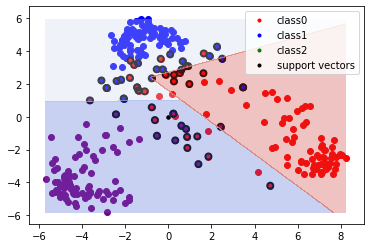

In [21]:
for i in range(len(x_pca)):
    if t[i] == 0:
        plt.scatter(x_pca[i][0], x_pca[i][1],c ='purple')
    elif t[i] == 1:
        plt.scatter(x_pca[i][0], x_pca[i][1],c ='blue')
    elif t[i] ==2:
        plt.scatter(x_pca[i][0], x_pca[i][1],c ='red')
#plt.scatter(c = 'green',label = 'class2')
xx ,yy = make_meshgrid()
plot_img(xx = xx,yy = yy)

In [22]:
#Polynomial kernel of degree 2
clf_p = svm.SVC(kernel = 'poly',degree = 2)

In [23]:
def poly_phi(x):
    if len(x.shape) == 1:
        return np.vstack((x[0]**2, np.sqrt(2)*x[0]*x[1], x[1]**2)).T 
    else:
        return np.vstack((x[:, 0]**2, np.sqrt(2)*x[:, 0]*x[:, 1], x[:, 1]**2)).T 


In [24]:
def svm_get_weight_p(class_1,class_2):
    if class_1 == 0 and class_2 == 1: 
        clf_p.fit(filter_x01,filter_t01) 
        v = clf_p.support_vectors_
        a = clf_p.dual_coef_
        b = clf_p.intercept_
        #a_square = np.square(a)
        p_v = poly_phi(v)
       # p_v2 = np.dot(p_v,p_v.T)
        w = np.dot(a,p_v)
    elif class_1 == 0 and class_2 == 2: 
        clf_p.fit(filter_x02,filter_t02) 
        v = clf_p.support_vectors_
        a = clf_p.dual_coef_
        b = clf_p.intercept_
        #a_square = np.square(a)
        p_v = poly_phi(v)
        #p_v2 = np.dot(p_v,p_v.T)
        w = np.dot(a,p_v)
    elif class_1 == 1 and class_2 == 2: 
        clf_p.fit(filter_x12,filter_t12) 
        v = clf_p.support_vectors_
        a = clf_p.dual_coef_
        b = clf_p.intercept_
        #a_square = np.square(a)
        p_v = poly_phi(v)
        #p_v2 = np.dot(p_v,p_v.T)
        w = np.dot(a,p_v)
    #print((w[0]))
    return  [ w , b , v]
    

In [25]:
#class 0 vs class 1
w01p = svm_get_weight_p(0,1)[0]
b01p = svm_get_weight_p(0,1)[1]
v_01p = svm_get_weight_p(0,1)[2]


#class0 vs class2
w02p = svm_get_weight_p(0,2)[0]
b02p = svm_get_weight_p(0,2)[1]
v_02p = svm_get_weight_p(0,2)[2]


#class 1 vs class2
w12p = svm_get_weight_p(1,2)[0]
b12p = svm_get_weight_p(1,2)[1]
v_12p = svm_get_weight_p(1,2)[2]

sv_p = []
"""w_01p = []
w_02p = []
w_12p = []"""
for i in w01p:
    w_01p = i
for i in b01p:
    b_01p = i

for i in w02p:
    w_02p = i
    #w_02p = i
for i in b01p:
    b_02p = i
    
for i in w12p:
    w_12p = i
for i in b12p:
    b_12p = i
    
    
for i in v_01p:
    sv_p.append(i)
for i in v_02p:
    sv_p.append(i)
for i in v_12p:
    sv_p.append(i)
#print(len(sv_p))

In [26]:
xx ,yy = make_meshgrid()    
#Y_temp = w[n+l][0,0]*(X1**2) + w[n+l][0,1]*math.sqrt(2)*X1*X2 + w[n+l][0,2]*(X2**2) + b[n+l]

y_01p = w_01p[0]*(np.square(x_range1))+w_01p[2]*(np.square(x_range2))+(w_01p[1]*math.sqrt(2)*np.dot(x_range2,x_range1))+b_01p
y_02p = w_02p[0]*(np.square(x_range1))+w_02p[2]*(np.square(x_range2))+(w_02p[1]*math.sqrt(2)*np.dot(x_range2,x_range1))+b_02p
y_12p = w_12p[0]*(np.square(x_range1))+w_12p[2]*(np.square(x_range2))+(w_12p[1]*math.sqrt(2)*np.dot(x_range2,x_range1))+b_12p


#print(len(y_01p))
y01p_class = []
y02p_class = []
y12p_class = []
yp_class = []
for j in (y_01p.flatten()):
    if j > 0:
        y01p_class.append(0)
    elif j<0:
        y01p_class.append(1)

for j in (y_02p.flatten()):
    if j > 0:
        y02p_class.append(0)
    elif j<0:
        y02p_class.append(2)
                      
for j in (y_12p.flatten()):
    if j > 0:
        y12p_class.append(1)
    elif j<0:
        y12p_class.append(2)

#print(len(y01p_class) ,len(y02p_class),len(y12p_class))           
            
            
for i in range(0,len(y01p_class)):
    tmp = []
    tmp.append(y01p_class[i])
    tmp.append(y02p_class[i])
    tmp.append(y12p_class[i])
    top = Counter(tmp).most_common(1)[0][0]
    #print(top)
    yp_class.append(top)
#print(len(y01p_class))
yp_class = np.array(yp_class)

yp_class = yp_class.reshape((len(xx),len(yy[0])))
"""print(yp_class.shape)
print(len(xx),len(yy[0]))"""

'print(yp_class.shape)\nprint(len(xx),len(yy[0]))'

In [27]:
def plot_p_img(xx,yy):
    for i in range(0,len(sv_p)):
        plt.scatter(sv_p[i][0], sv_p[i][1], facecolors='none', edgecolors='k', linewidths=2)
    plt.plot(0, 0, '.',color='red', label='class0')
    plt.plot(0, 0, '.',color='blue', label='class1')
    plt.plot(0, 0, '.',color='green', label='class2')
    plt.plot(0, 0,'.',color='black', label='support vectors')
    
    plt.legend()
        
    plt.contourf(xx, yy, yp_class, alpha=0.2, cmap=plt.cm.coolwarm)

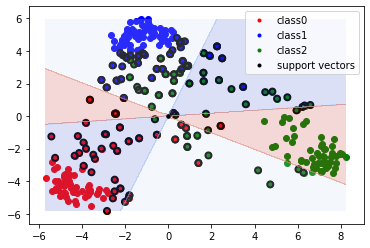

In [28]:
for i in range(len(x_pca)):
    if t[i] == 0:
        plt.scatter(x_pca[i][0], x_pca[i][1],c ='red')
    elif t[i] == 1:
        plt.scatter(x_pca[i][0], x_pca[i][1],c ='blue')
    elif t[i] ==2:
        plt.scatter(x_pca[i][0], x_pca[i][1],c ='green')

plot_p_img(xx = xx,yy = yy)

# Prob 3

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy.random as ran
from scipy.stats import multivariate_normal as mvn
import math
from PIL import Image
from copy import deepcopy

In [30]:
img1 = cv.imread("./dataset/imghw3.jpg")
img1 = cv.resize(img1, (1000, 1000))
#print(img.shape)

NameError: name 'cv' is not defined

In [ ]:
length = img1.shape[0] 
width = img1.shape[1]
N = length * width 
N_RGB = 3
K = [3, 5 , 7 ,10]
zero_v = np.zeros([1,3])
plot_x=np.linspace(1,100,100)

In [ ]:
def dist(data, miu):
    return np.linalg.norm(data - miu, axis = 1)

In [ ]:
def set_training(i):
    train_data = np.array(img1.reshape((-1,3)),float) 
    normalized_train_data = train_data/255.0 

    miu = np.array(ran.randint(np.min(train_data)+10,np.max(train_data)-10,size=(K[i],N_RGB))/255) 
    miu_old = np.zeros(miu.shape) 
    threshold = sum(dist(miu, miu_old)) 
    D = np.mat(np.zeros([N,K[i]]))
    R = np.zeros([N,K[i]]) 
    R = np.mat(R, dtype = int )
    return [miu,miu_old,D,R,threshold]

In [ ]:
def K_means(i,threshold,iteration = 0):
    if K[i] == 20:        
        while threshold >= 0.00000001:
            for k in range(0,K[i]):
                uuu = np.mat(miu[k,:]) 
                miu_k = np.tile(uuu,(N,1))
                d = np.mat(dist(normalized_train_data, miu_k), float).T 
                D[:,k] = d  
            arg = np.argmin(D, axis = 1) 
            arg = np.tile(arg,(1,K[i]))
            for k in range(0,K[i]):
                classk = np.mat(np.ones(N)*k).T
                R[:,k]  = np.mat((arg[:,k] == classk),float) 
                       
            miu_old = deepcopy(miu)
            one = np.mat(np.ones(N)).T
            for k in range(0,K[i]):
                rnk_tol = R[:,k].T*one    
                miu[k] = (R[:,k].T * normalized_train_data) / rnk_tol 
                if math.isnan(np.sum(miu[k])):
                    miu[k] = zero_v
            threshold = sum(dist(miu, miu_old))
            iteration = iteration + 1
        print(miu)
    else:
        while threshold != 0:
            for k in range(0,K[i]):
                uuu = np.mat(miu[k,:])
                miu_k = np.tile(uuu,(N,1))
                d = np.mat(dist(normalized_train_data, miu_k), float).T
                D[:,k] = d
            arg = np.argmin(D, axis = 1)
            arg = np.tile(arg,(1,K[i]))
            for k in range(0,K[i]):
                classk = np.mat(np.ones(N)*k).T
                R[:,k]  = np.mat((arg[:,k] == classk),float)
                      
            miu_old = deepcopy(miu)
            one = np.mat(np.ones(N)).T
            for k in range(0,K[i]):
                rnk_tol = R[:,k].T*one          
                miu[k] = (R[:,k].T * normalized_train_data) / rnk_tol
                if math.isnan(np.sum(miu[k])):
                    miu[k] = zero_v
            threshold = sum(dist(miu, miu_old))
            iteration = iteration + 1

        print('When K = %d, miu is :' %K[i])
        print(miu)

In [ ]:
def initial_(i):
    coef = np.zeros([K[i],1])
    for k in range(0,K[i]):
        coef[k,0] = np.sum(R[:,k]) / N
    

    R_T = R.T
    R_T = np.array(R_T)
    Cov_matrix = np.zeros((K[i], 3, 3))
    for k in range(0,K[i]):
        ys = normalized_train_data - miu[k, :]
        Cov_matrix[k] = (R_T[k,:,None,None] * (ys[:,:,None]@ys[:,None,:])).sum(axis=0)
    Cov_matrix /= R_T.sum(axis=1)[:,None,None]
    return [coef,Cov_matrix]

In [ ]:
def em_algorithm(i,coef,Cov_matrix,z1):    
    ll = []
    ll_old = 0
    t1 = 0
    print('Strat EM.')
    for iters in range(100):
        ll_new = 0
        w = np.zeros((K[i], N))
        for j in range(0,K[i]):
            w[j,:] = coef[j] * mvn(miu[j,:], Cov_matrix[j,:,:]).pdf(normalized_train_data)
        w /= w.sum(0)
    
        coef = w.sum(1)
        coef /= N
    
        u = np.dot(w, normalized_train_data)
        u /= w.sum(1)[:, None]
    
        Cov_matrix = np.zeros((K[i], 3, 3))
        for j in range(0,K[i]):
            ys = normalized_train_data - miu[j, :]
            Cov_matrix[j] = (w[j,:,None,None] * (ys[:,:,None]@ys[:,None,:])).sum(axis=0)
        Cov_matrix /= w.sum(axis=1)[:,None,None]
        Cov_matrix += 0.0001                   
    

        ll_new = 0
        for k in range(0,K[i]):
            ll_new += coef[k]*mvn(u[k,:], Cov_matrix[k,:,:]).pdf(normalized_train_data)
        ll_new = np.log(ll_new).sum()
        ll.append(ll_new)    
        ll_old = ll_new
        t1 = t1 + 1
    
    print('When K = %d, Loglikelihood curve:' %K[i])
    plt.figure(z1)
    z1 += 1
    l0 = plt.plot(plot_x,ll, 'co-',markerfacecolor='b',markersize=5);
    plt.title('When K = %d ,Loglikelihood curve:' %K[i])
    plt.xlabel('Numbers of iterations of GMM');
    plt.ylabel('Loglikelihood');
    plt.show() 

    Plot_img = np.zeros([N,3])
    for k in range(0,K[i]):
        for n in range(N):
            if R[n,k] == 1:
                Plot_img[n,:] = miu[k,:]
    Plot_img = np.array(Plot_img*255,int)
    Plot_img = Plot_img.reshape((img1.shape))
    Plot_img = Plot_img.astype(np.uint8)
    plt.figure(z1)
    z1 += 1
    img = Image.fromarray(Plot_img)            
    plt.title('K = %d' %K[i])
    imgplot = plt.imshow(img)           
    plt.show() 

In [ ]:
for i in range(0,len(K)):
    [miu,miu_old,D,R,threshold] = set_training(i = i)
    K_means(i = i,threshold = threshold)
    [coef,Cov_matrix] = initial_(i = i )
    em_algorithm(i = i,coef = coef,Cov_matrix = Cov_matrix,z1 =1)